In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets 

from scipy import stats

**<h1>limpieza de la base de datos HOUSES</h1>**

In [16]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
print(df.shape)
print(df.nunique())
print(df.info())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-n

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('waterfront', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0


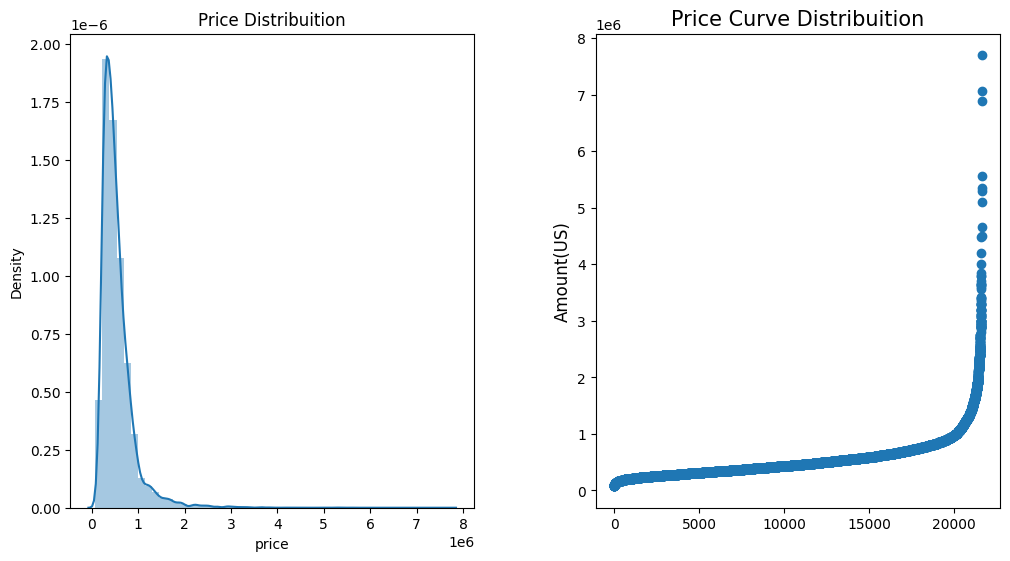

In [22]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()


<Figure size 800x500 with 0 Axes>

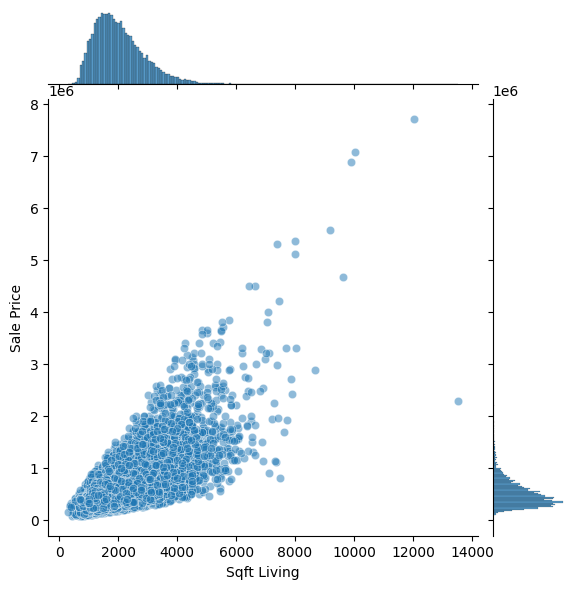

In [23]:
plt.figure(figsize=(8, 5))
sns.jointplot(data=df, x='sqft_living', y='price', alpha=0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

<Figure size 800x500 with 0 Axes>

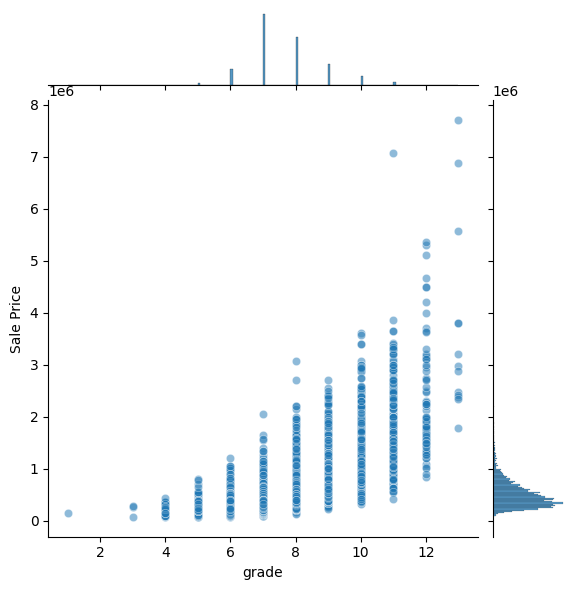

In [24]:
plt.figure(figsize=(8, 5))
sns.jointplot(data=df, x='grade', y='price', alpha=0.5)
plt.xlabel('grade')
plt.ylabel('Sale Price')
plt.show()

Condition counting: 
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64


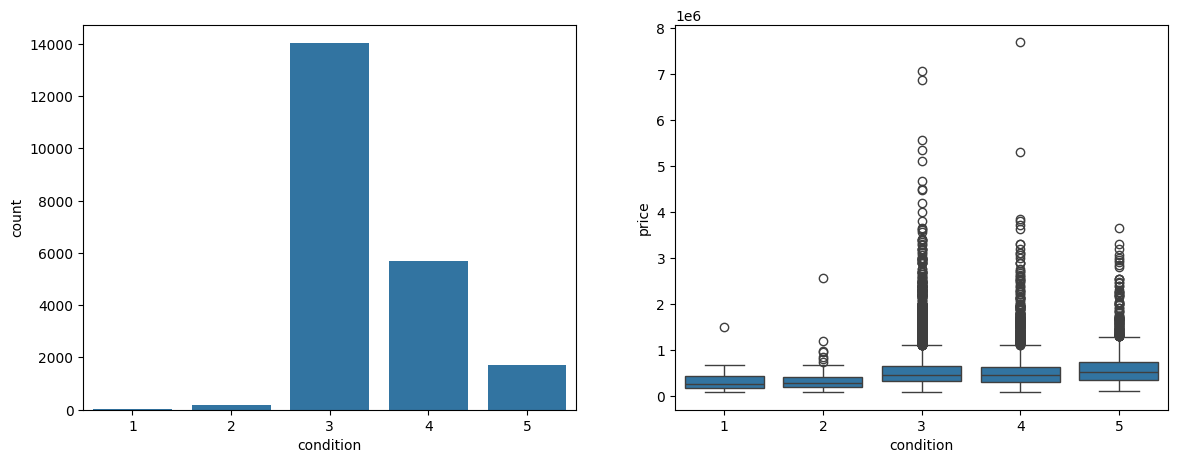

In [25]:
condition = df['condition'].value_counts()

print("Condition counting: ")
print(condition)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df, ax=ax[0])
sns.boxplot(x='condition', y= 'price',data=df, ax=ax[1])
plt.show()

**<h1>MODELO DE REGRESION</H1>**

In [27]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
#Y_np = df["price"]
eps = eps = np.random.normal(0 ,1 ,len(X))

In [54]:
# Seleccionar varias características como variables independientes
variables_independientes = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Combinación lineal de características para generar x['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
x = df[variables_independientes].sum(axis=1)

# Coeficientes para generar y
#coeficientes = np.array([2, 3, 1.5, 0.5, 2,3,1.5,2,3,2.5,3,1.5])

# Calcular y usando una combinación lineal de x y coeficientes
#y_np = np.dot(df[variables_independientes], coeficientes)

y_np=df['price']

# Agregar un término de error
#np.random.seed(1)
#eps = np.random.normal(0 ,1 , len(x))
#y_np += eps

# Graficar los datos
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x=x, y=y_np)
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.title('Relación entre X y Y')
#plt.show()

#sns.scatterplot(x=x, y=y_np);


In [48]:
def get_models(k, X, y):
    """
    Fit all possible models that contain exactly k predictors.
    """
    # List all available predictors
    X_combos = itertools.combinations(list(X.columns), k)
    
    # Fit all models accumulating Residual Sum of Squares (RSS)
    models = []
    for X_label in X_combos:
        # Parse patsy formula
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], X_smf)
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Return results
        models += [(f, model)]
    return models


def min_rss(statsmodels):
    """Return model with lowest Residual Sum of Squares (RSS)"""
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]


def max_adjr2(statsmodels):
    """Return model with max R-squared"""
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]

def min_bic(statsmodels):
    """Return model with min Bayes' Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]

def min_aic(statsmodels):
    """Return model with min Akaike's Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]


In [53]:

X = pd.DataFrame({'bedrooms': df["bedrooms"],
                  'bathrooms': df["bathrooms"],
                  'sqft_living': df["sqft_living"],
                  'sqft_lot': df["sqft_lot"],
                  'floors': df["floors"],
                  'view': df["view"],
                  'condition': df["condition"],
                  'grade': df["grade"],
                  'sqft_above': df["sqft_above"],
                  'sqft_basement': df["sqft_basement"],
                  'yr_built': df["yr_built"],
                  'yr_renovated': df["yr_renovated"]})
y = pd.DataFrame({'price':y_np})

# get all model results
model_subsets = []
for k in range(len(X.columns)):
    k=k+1
    subset = get_models(k, X, y)
    model_subsets += [subset]
    print('Progess: k = {}, done'.format(k))

Progess: k = 1, done
Progess: k = 2, done
Progess: k = 3, done
Progess: k = 4, done
Progess: k = 5, done
Progess: k = 6, done
Progess: k = 7, done
Progess: k = 8, done
Progess: k = 9, done
Progess: k = 10, done
Progess: k = 11, done
Progess: k = 12, done


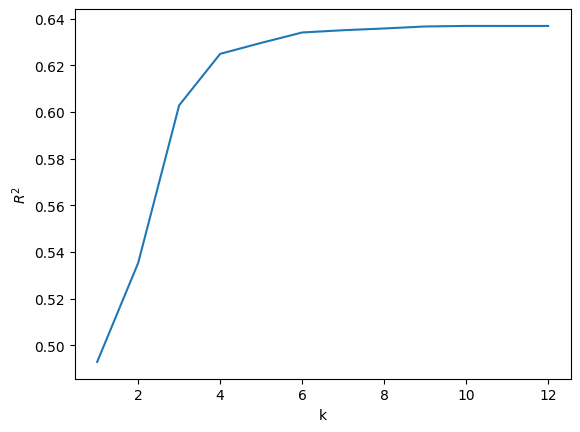

Model selected: 
Intercept       6.140687e+06
bedrooms       -4.154785e+04
bathrooms       4.490741e+04
sqft_living     1.732518e+02
sqft_lot       -2.692803e-01
floors          2.606563e+04
view            7.131049e+04
condition       1.973526e+04
grade           1.223026e+05
yr_built       -3.537538e+03
yr_renovated    1.553012e+01
dtype: float64


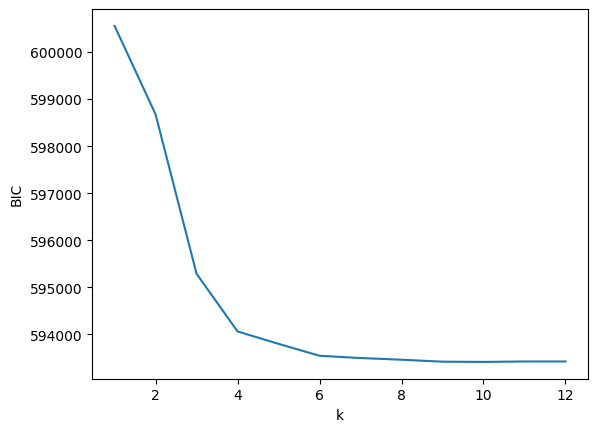

Model selected: 
Intercept       6.140687e+06
bedrooms       -4.154785e+04
bathrooms       4.490741e+04
sqft_living     1.732518e+02
sqft_lot       -2.692803e-01
floors          2.606563e+04
view            7.131049e+04
condition       1.973526e+04
grade           1.223026e+05
yr_built       -3.537538e+03
yr_renovated    1.553012e+01
dtype: float64


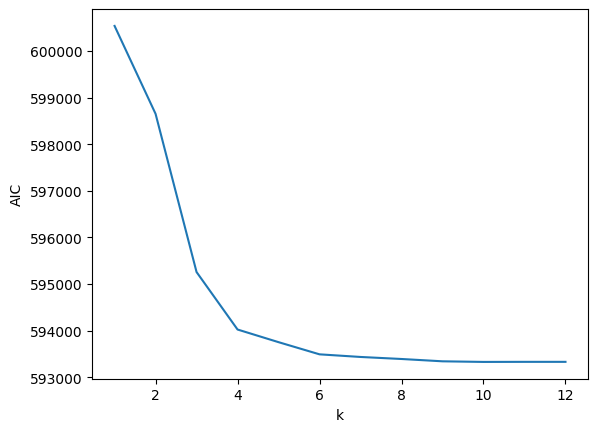

Model selected: 
Intercept       6.140687e+06
bedrooms       -4.154785e+04
bathrooms       4.490741e+04
sqft_living     1.732518e+02
sqft_lot       -2.692803e-01
floors          2.606563e+04
view            7.131049e+04
condition       1.973526e+04
grade           1.223026e+05
yr_built       -3.537538e+03
yr_renovated    1.553012e+01
dtype: float64


In [55]:
# Get predictor count
k = np.arange(1, len(X.columns)+1)

# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))

# Plot best r-squared score for each subset
adjr2 = [max_adjr2(m)[1].rsquared_adj for m in model_subsets]

sns.lineplot(x=k, y=adjr2)
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.show()

# Select best subset
coefs_r2 = [(max_adjr2(m)[1].rsquared_adj, max_adjr2(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(max(coefs_r2)[1]))


# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))

# Get best BIC
bic = [min_bic(m)[1].bic for m in model_subsets]

sns.lineplot(x=k, y=bic)
plt.xlabel('k')
plt.ylabel('BIC')
plt.show()

# Select best subset
coefs_bic = [(min_bic(m)[1].bic, min_bic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_bic)[1]))


# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))

# Get best AIC
aic = [min_aic(m)[1].aic for m in model_subsets]

sns.lineplot(x=k, y=aic)
plt.xlabel('k')
plt.ylabel('AIC')
plt.show()

# Select best subset
coefs_aic = [(min_aic(m)[1].aic, min_aic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_aic)[1]))

Comentario: RSS elige un modelo con demasiadas características como era de esperar debido al sobreajuste. BIC y AIC intentan compensar el sobreajuste y hacen un trabajo razonable al elegir un modelo con una característica sobrante.

#### (d) Repita (c), utilizando la selección stepwise forward y backwards ¿Cómo se compara tu respuesta con los resultados de (c)?

In [56]:
def forward_stepwise(X, y, scorer='ssr', results=[(0, [])]):
    """Perform forward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.207)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all    = list(X.columns)
    p_used   = results[-1][1]
    p_unused = [p for p in p_all if p not in p_used]
    
    # Job done, exit recursion
    if not p_unused:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds}).drop(0)
    
    # Get score for each possible additional predictor
    r = []
    for p in p_unused:
        f     = '{} ~ {}'.format(y.columns[0], '+'.join([p]+p_used))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r    += [(model, [p]+p_used)]
    
    # Choose predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 
                        
    new_results = results + [best_score]
    # Recursive call to self
    return forward_stepwise(X, y, scorer, new_results)

In [57]:
def backward_stepwise(X, y, scorer='ssr', results=[]):
    """Perform backward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.209)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all = list(X.columns)

    # Check if we're starting out here
    if not results:
        # Fit model with all features
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Begin backward stepwise recursion
        if scorer == 'ssr':
            return backward_stepwise(X, y, scorer, [(model.ssr, p_all)])
        if scorer == 'rsquared_adj':
            return backward_stepwise(X, y, scorer, [(model.rsquared_adj, p_all)])
        if scorer == 'bic':
            return backward_stepwise(X, y, scorer, [(model.bic, p_all)])
        if scorer == 'aic':
            return backward_stepwise(X, y, scorer, [(model.aic, p_all)])
    else:
        p_used = results[-1][1]
    
    # Job done, exit recursion
    if len(p_used) == 1:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds})    
    
    # Get rss score for each possible removed predictor
    r = []
    for p in p_used:
        p_test = [i for i in p_used if i != p]
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_test))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r     += [(model, p_test)]
    
    # Choose removal of predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 

    new_results = results + [best_score]
    # Recursive call to self
    return backward_stepwise(X, y, scorer, new_results)


def subset_analysis(df, scorer):
    """Renders results from forward_stepwise() and backward_stepwise()"""
    df['predictors_str'] = df['predictors'].astype(str)
    
    ax = sns.lineplot(x='predictors_str', y=scorer, data=df, sort=False)
    plt.xticks(rotation=90)
    plt.show();
    
    if scorer == 'rsquared_adj':
        display(df[df[scorer] ==  df[scorer].max()].drop('predictors_str', axis=1))
    else:
        display(df[df[scorer] ==  df[scorer].min()].drop('predictors_str', axis=1))

#### Forward stepwise selection

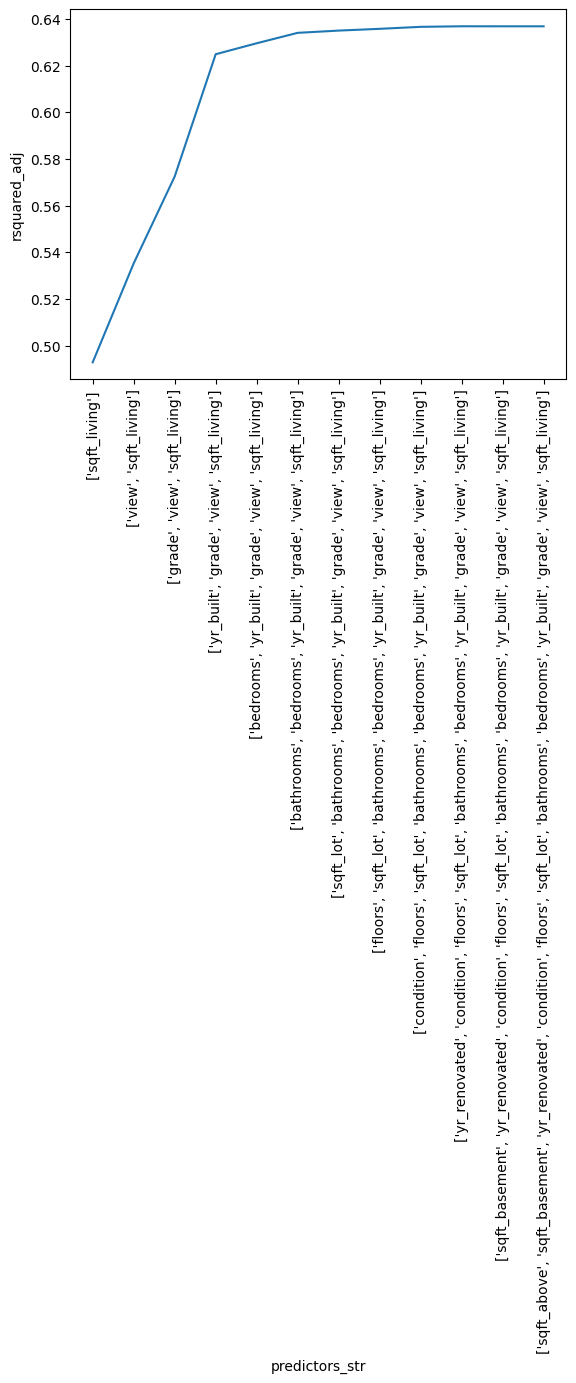

,rsquared_adj,predictors
10,0.636875,"[yr_renovated, condition, floors, sqft_lot, ba..."


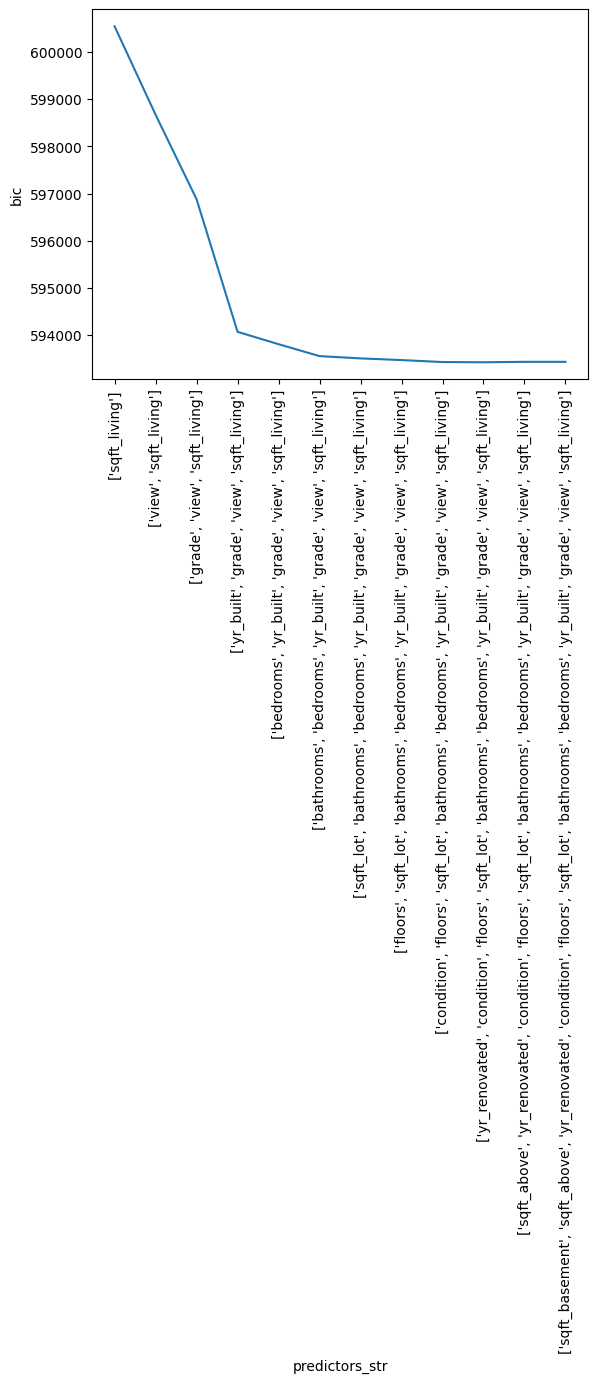

,bic,predictors
10,593414.432364,"[yr_renovated, condition, floors, sqft_lot, ba..."


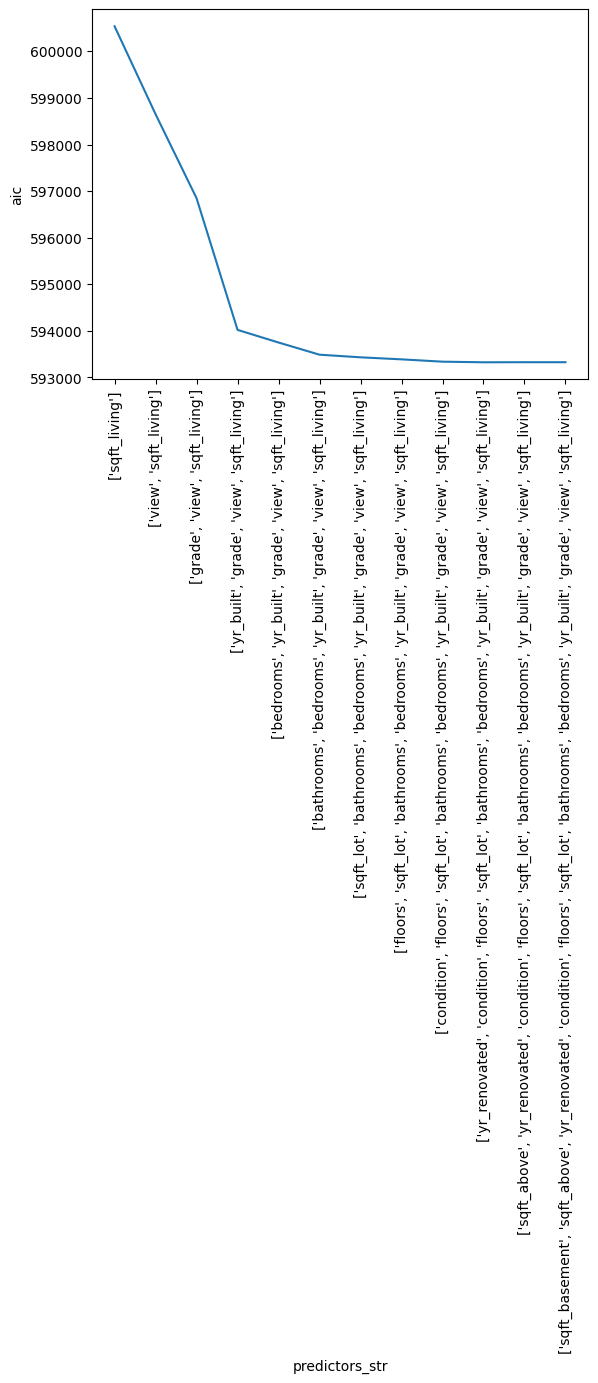

,aic,predictors
10,593326.640811,"[yr_renovated, condition, floors, sqft_lot, ba..."


In [58]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

#### Backward stepwise selection

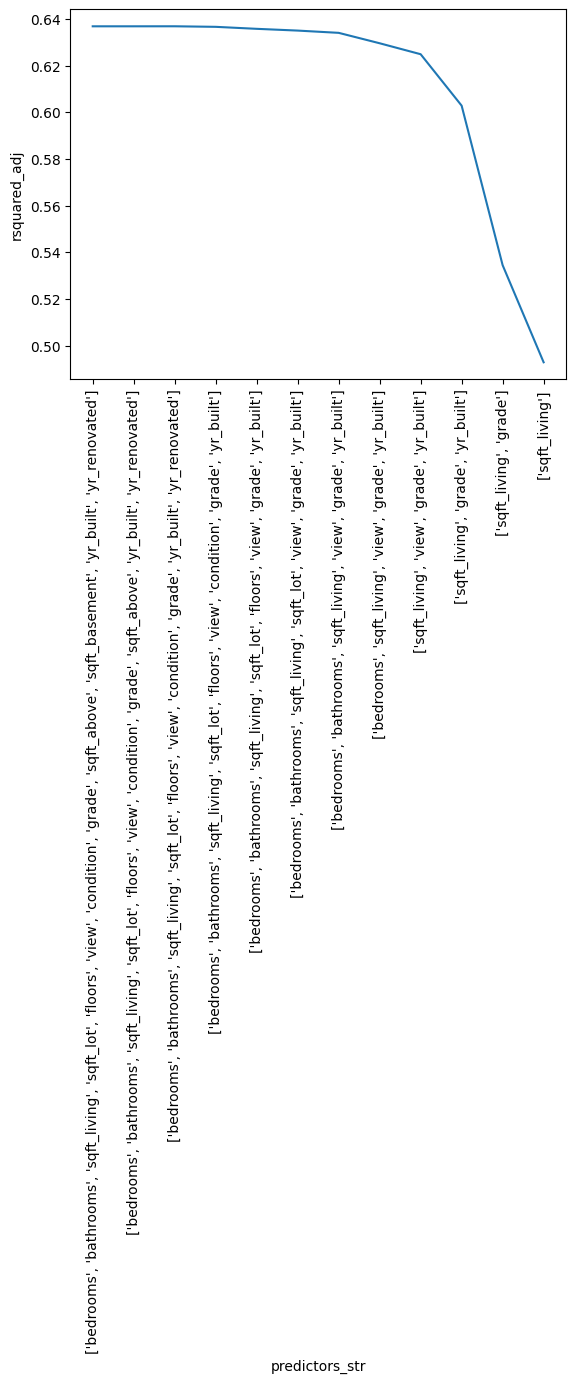

,rsquared_adj,predictors
2,0.636875,"[bedrooms, bathrooms, sqft_living, sqft_lot, f..."


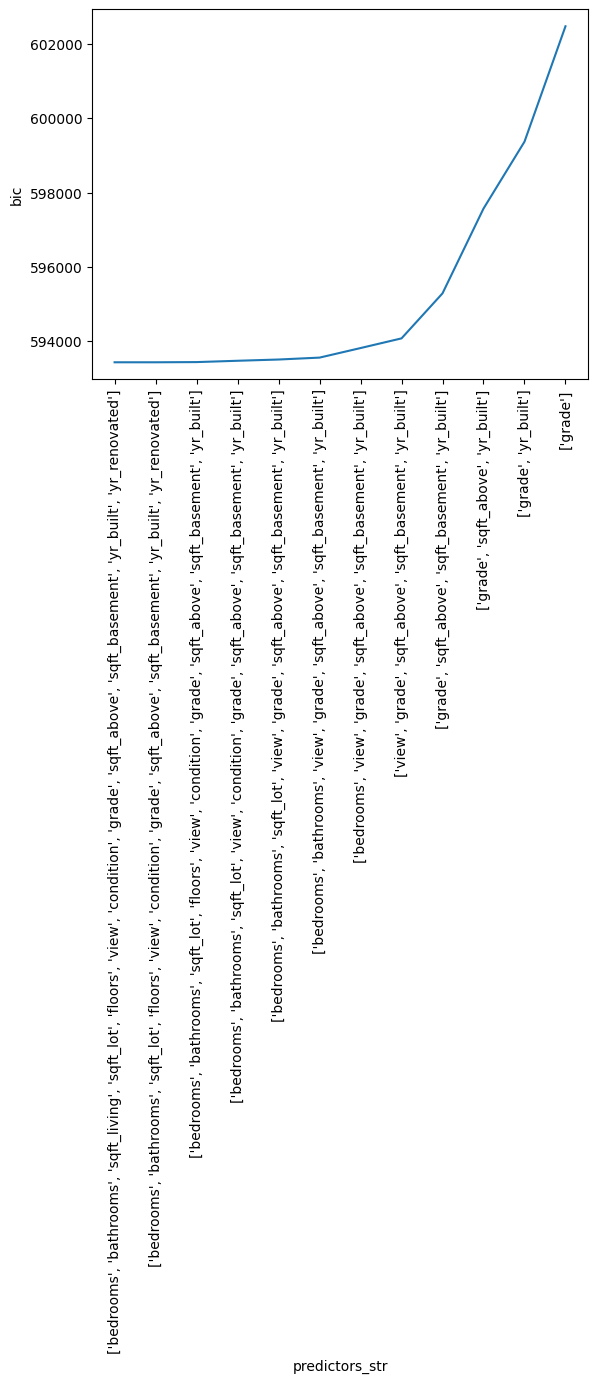

,bic,predictors
0,593424.054888,"[bedrooms, bathrooms, sqft_living, sqft_lot, f..."
1,593424.054888,"[bedrooms, bathrooms, sqft_lot, floors, view, ..."


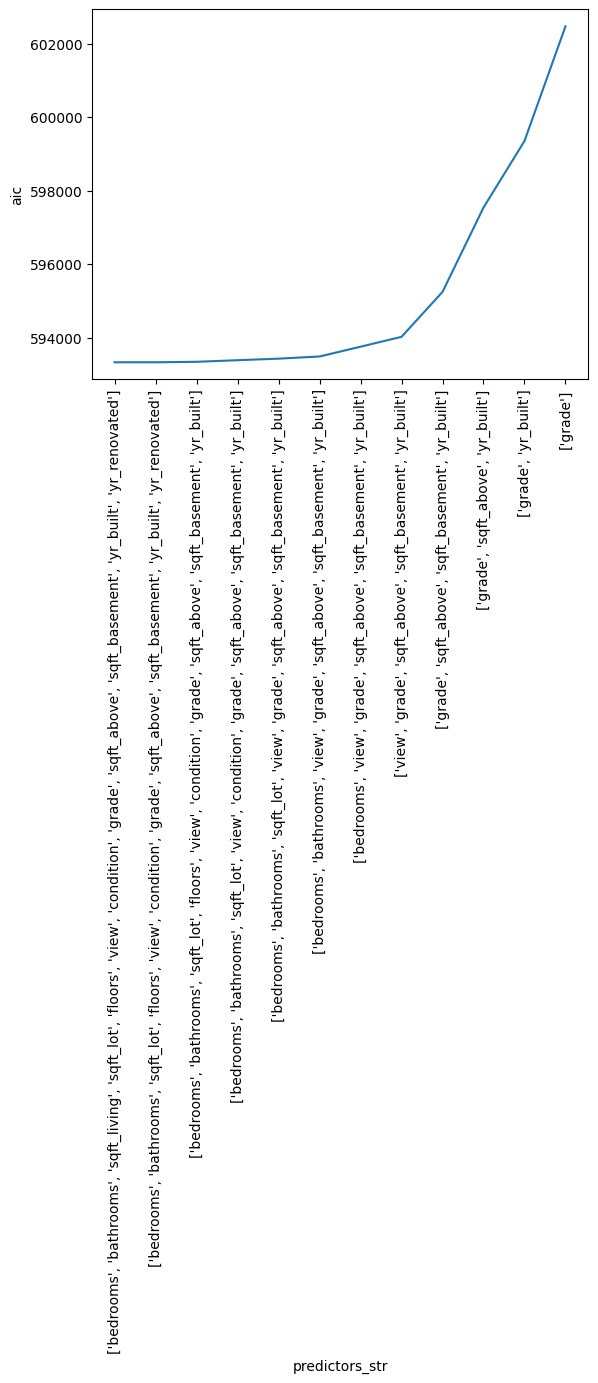

,aic,predictors
0,593328.282285,"[bedrooms, bathrooms, sqft_living, sqft_lot, f..."
1,593328.282285,"[bedrooms, bathrooms, sqft_lot, floors, view, ..."


In [59]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

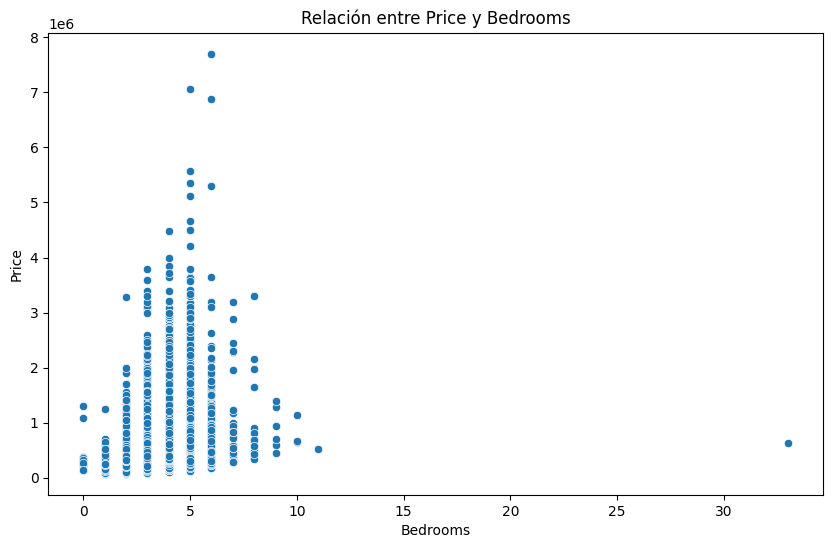

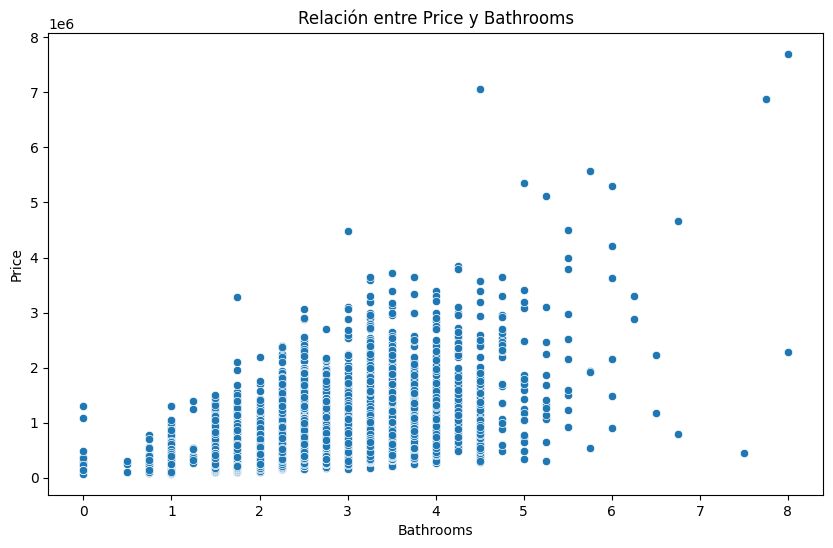

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot entre price y bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Relación entre Price y Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Plot entre price y bathrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.title('Relación entre Price y Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

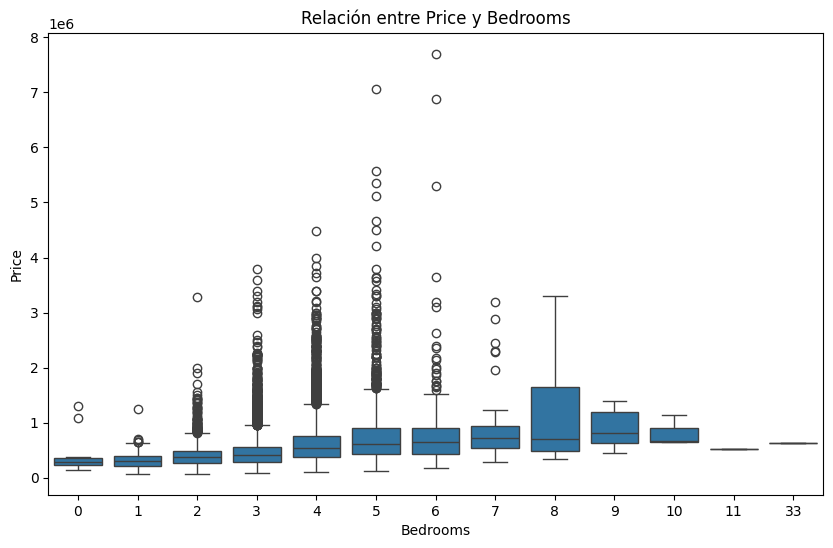

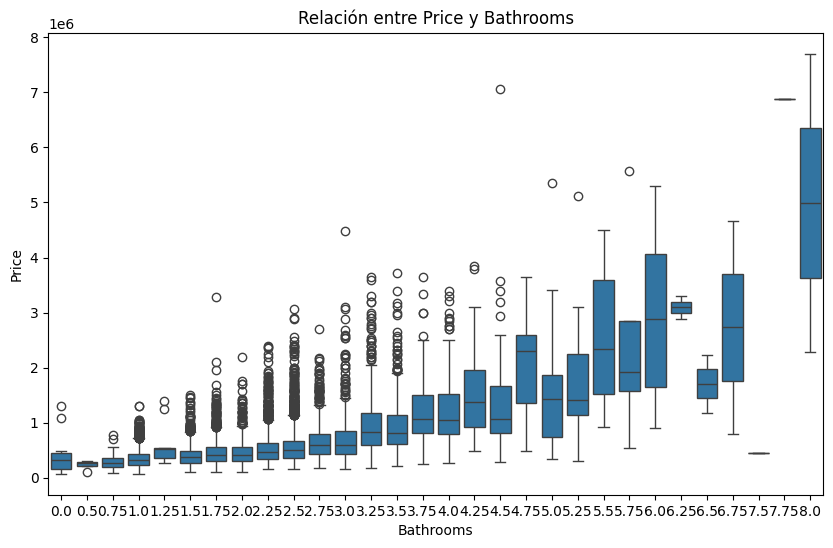

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la relación entre price y bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Relación entre Price y Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Gráfico de caja para la relación entre price y bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('Relación entre Price y Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
